# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#print city to see what it the list looks like.
print(cities[0])

qaanaaq


In [4]:
# base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# run a request using our params dictionary
response = requests.get(query_url + cities[0]).json()
print(json.dumps(response, indent=4))

{
    "coord": {
        "lon": -69.36,
        "lat": 77.48
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 18.61,
        "pressure": 1016.32,
        "humidity": 76,
        "temp_min": 18.61,
        "temp_max": 18.61,
        "sea_level": 1016.32,
        "grnd_level": 977.04
    },
    "wind": {
        "speed": 10.38,
        "deg": 84.112
    },
    "clouds": {
        "all": 95
    },
    "dt": 1569453939,
    "sys": {
        "message": 0.008,
        "country": "GL",
        "sunrise": 1569407312,
        "sunset": 1569450590
    },
    "timezone": -10800,
    "id": 3831208,
    "name": "Qaanaaq",
    "cod": 200
}


In [5]:
# set up lists to hold reponse info
cityweather = []
lat = []
lng = []
temp = []
cloudiness = []
country = []
date = []
humidity = []
maxtemp = []
windspeed =  []


# Loop through the list of cities and perform a request for data on each
count = 0
set_count = 1

for city in cities:
    response = requests.get(query_url + city).json()    
    count += 1
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        maxtemp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        cityweather.append(city)
        print(f"Processing Record {count} of Set {set_count} | {city}")
    except KeyError:
        print("City not found. Skipping...")

#Count every 50 as a set
    if count == 50:
        count = 0
        set_count += 1
    time.sleep(.1)

Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | moerai
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | umm kaddadah
City not found. Skipping...
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | viedma
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | sibolga
City not found. Skipping...
Processing Record 15 of Set 1 | rosarito
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | rabaul
Processing Record 19 of Set 1 | tadine
City not found. Skipping...
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | palana
Processing Record 23 of Set 1 | saint-philippe
Processing Record 24 of Set 1 | kirakira
Processing Record 25 of Set 1 | lebu
City not found. Skipping...
P

Processing Record 10 of Set 5 | georgetown
Processing Record 11 of Set 5 | goure
Processing Record 12 of Set 5 | coihaique
Processing Record 13 of Set 5 | beloha
Processing Record 14 of Set 5 | airai
Processing Record 15 of Set 5 | novolabinskaya
Processing Record 16 of Set 5 | kangaatsiaq
Processing Record 17 of Set 5 | puerto quijarro
Processing Record 18 of Set 5 | manali
Processing Record 19 of Set 5 | necochea
Processing Record 20 of Set 5 | puerto leguizamo
City not found. Skipping...
Processing Record 22 of Set 5 | havelock
Processing Record 23 of Set 5 | kozachi laheri
Processing Record 24 of Set 5 | usinsk
Processing Record 25 of Set 5 | taltal
Processing Record 26 of Set 5 | abu dhabi
Processing Record 27 of Set 5 | kutum
City not found. Skipping...
Processing Record 29 of Set 5 | sayansk
Processing Record 30 of Set 5 | brae
Processing Record 31 of Set 5 | nacogdoches
Processing Record 32 of Set 5 | esperance
Processing Record 33 of Set 5 | tiksi
Processing Record 34 of Set 5

Processing Record 14 of Set 9 | sirpur
Processing Record 15 of Set 9 | salinopolis
Processing Record 16 of Set 9 | port-de-bouc
Processing Record 17 of Set 9 | waiouru
Processing Record 18 of Set 9 | sobolevo
Processing Record 19 of Set 9 | didsbury
Processing Record 20 of Set 9 | medea
Processing Record 21 of Set 9 | torbay
Processing Record 22 of Set 9 | vardo
Processing Record 23 of Set 9 | zyryanka
Processing Record 24 of Set 9 | hamilton
City not found. Skipping...
Processing Record 26 of Set 9 | aklavik
Processing Record 27 of Set 9 | konya
Processing Record 28 of Set 9 | okhotsk
Processing Record 29 of Set 9 | balakliya
Processing Record 30 of Set 9 | hobyo
Processing Record 31 of Set 9 | belaya gora
Processing Record 32 of Set 9 | male
City not found. Skipping...
Processing Record 34 of Set 9 | yuzhno-kurilsk
Processing Record 35 of Set 9 | pionerskiy
Processing Record 36 of Set 9 | birao
Processing Record 37 of Set 9 | ahipara
Processing Record 38 of Set 9 | priupskiy
Processi

Processing Record 14 of Set 13 | silopi
Processing Record 15 of Set 13 | nizhniy kuranakh
Processing Record 16 of Set 13 | linares


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a DataFrame based on the lists
weather_df = pd.DataFrame({
    "City": cityweather, 
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": maxtemp,
    "Wind Speed": windspeed})

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,qaanaaq,95,GL,1569453939,76,77.48,-69.36,18.61,10.38
1,moerai,95,PF,1569453940,83,-22.43,-151.33,72.66,11.07
2,mataura,100,NZ,1569453778,88,-46.19,168.86,46.99,18.99
3,umm kaddadah,77,SD,1569453941,20,13.60,26.69,90.10,8.88
4,avarua,99,CK,1569453766,78,-21.21,-159.78,77.00,13.87


In [7]:
#Count the number of records
weather_df.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

In [8]:
#write file to csv
weather_df.to_csv("../output_data/cityweather.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

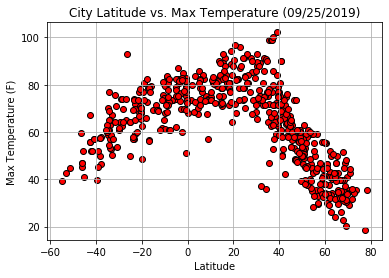

In [9]:
#plot latitude vs temperature
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker="o", facecolors="red", edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
#The date at the time the graph was ran.
#todays_date = time.ctime()
todays_date = time.strftime("(%m/%d/%Y)")         
plt.title(f"City Latitude vs. Max Temperature {todays_date}")

#save image as png
plt.savefig("../output_data/MaxTemp.png")
#show plot
plt.show()

__The graph is representing the max temperature as it relates to the latitude of the city. The latitude is specific to the distance north and south of the equator. A negative latitude is south of the equator while a positive latitude is north. A zero latitude is the equator. As we can see highest max temperatures appear to be distribute around the equator.__

#### Latitude vs. Humidity Plot

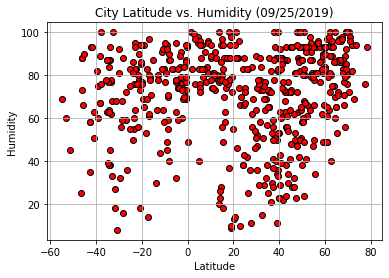

In [10]:
#plot latitude vs humidity
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker="o", facecolors="red", edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#The date at the time the graph was ran.
#todays_date = time.ctime()
todays_date = time.strftime("(%m/%d/%Y)")          
plt.title(f"City Latitude vs. Humidity {todays_date}")

#save image as png
plt.savefig("../output_data/Humidity.png")
#show plot
plt.show()

__Humidity apears to be the greatest around the equator. However all varying latitudes appear to have high humidity as well. To see if longitude played a bigger factor I created another chart below.__

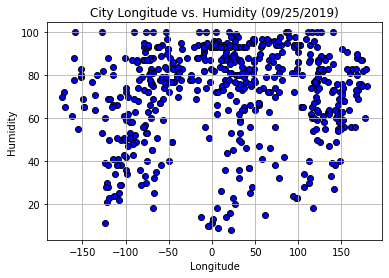

In [11]:
#plot longitude vs humidity  I wanted to see if there was a better relationship
plt.scatter(weather_df['Lng'], weather_df['Humidity'], marker="o", facecolors="blue", edgecolors="black")
plt.grid()
plt.xlabel("Longitude")
plt.ylabel("Humidity")

#The date at the time the graph was ran.
#todays_date = time.ctime()
todays_date = time.strftime("(%m/%d/%Y)")           
plt.title(f"City Longitude vs. Humidity {todays_date}")

#save plot as png
plt.savefig("../output_data/TestingLngHumidity.png")
#show plot
plt.show()

#### Latitude vs. Cloudiness Plot

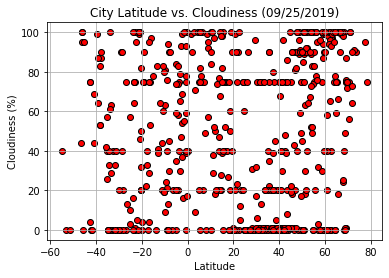

In [12]:
#plot latitude vs cloudiness
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker="o", facecolors="red", edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#The date at the time the graph was ran.
#todays_date = time.ctime()
todays_date = time.strftime("(%m/%d/%Y)")
plt.title(f"City Latitude vs. Cloudiness {todays_date}")

#save plot as png
plt.savefig("../output_data/Cloudiness.png")

#show plot
plt.show()


__Cloudiness seems to be greatest at the equator and in the northern hemisphere.__

#### Latitude vs. Wind Speed Plot

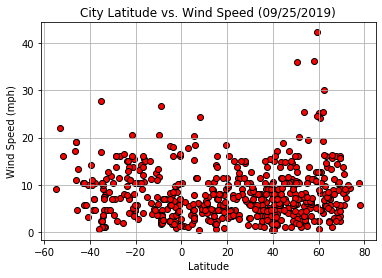

In [13]:
#plot latitude vs wind speed
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker="o", facecolors="red", edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#The date at the time the graph was ran.
#todays_date = time.ctime()
todays_date = time.strftime("(%m/%d/%Y)")            
plt.title(f"City Latitude vs. Wind Speed {todays_date}")

#save image as png
plt.savefig("../output_data/WindSpeed.png")
#show plot
plt.show()

__Although wind speed appears to be relatively consistent regarless of latitude, there are spikes closer to the poles. This indicates you will experience greater wind speeds the farther away from the equator.__

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots


In [15]:
# Create Northern Hemisphere DataFrames
Nweather_df = pd.DataFrame({
    "City": cityweather, 
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": maxtemp,
    "Wind Speed": windspeed})

#set up to drop any negative latitudes
Nweather_df['Lat'] = Nweather_df[Nweather_df['Lat'] > 0]['Lat']
NH_df = Nweather_df.dropna(how ='any', subset=['Lat'])
NH_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,qaanaaq,95,GL,1569453939,76,77.48,-69.36,18.61,10.38
3,umm kaddadah,77,SD,1569453941,20,13.60,26.69,90.10,8.88
7,kapaa,90,US,1569453942,88,22.08,-159.32,82.40,3.36
10,butaritari,9,KI,1569453943,76,3.07,172.79,83.62,17.83
11,sibolga,90,ID,1569453943,83,1.74,98.78,79.83,6.40


In [16]:
NH_df.count()

City          389
Cloudiness    389
Country       389
Date          389
Humidity      389
Lat           389
Lng           389
Max Temp      389
Wind Speed    389
dtype: int64

In [17]:
# Create Southern Hemisphere DataFrames
Sweather_df = pd.DataFrame({
    "City": cityweather, 
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": maxtemp,
    "Wind Speed": windspeed})

#set up to drop any positive latitudes
Sweather_df['Lat'] = Sweather_df[Sweather_df['Lat'] < 0]['Lat']
SH_df = Sweather_df.dropna(how ='any', subset=['Lat'])
SH_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,moerai,95,PF,1569453940,83,-22.43,-151.33,72.66,11.07
2,mataura,100,NZ,1569453778,88,-46.19,168.86,46.99,18.99
4,avarua,99,CK,1569453766,78,-21.21,-159.78,77.00,13.87
5,jamestown,0,AU,1569453662,33,-33.21,138.60,67.05,7.78
6,punta arenas,0,CL,1569453942,60,-53.16,-70.91,42.80,21.92


In [18]:
SH_df.count()

City          169
Cloudiness    169
Country       169
Date          169
Humidity      169
Lat           169
Lng           169
Max Temp      169
Wind Speed    169
dtype: int64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8156165319022018


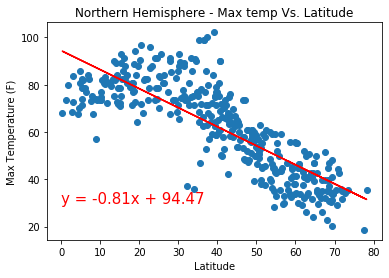

In [19]:
# Print out the r-squared value along with the plot.
x_values = NH_df['Lat']
y_values = NH_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(0,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max temp Vs. Latitude")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7156907060812933


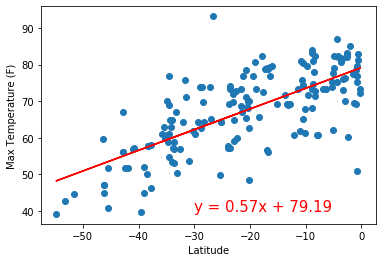

In [20]:
# Print out the r-squared value along with the plot.
x_values = SH_df['Lat']
y_values = SH_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(-30,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14346814618387826


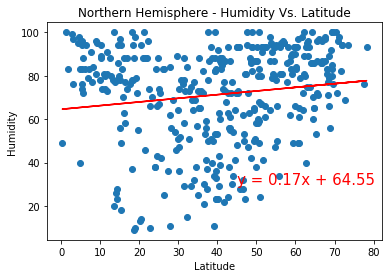

In [21]:
# Print out the r-squared value along with the plot.
x_values = NH_df['Lat']
y_values = NH_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(45,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity Vs. Latitude")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2039549482849359


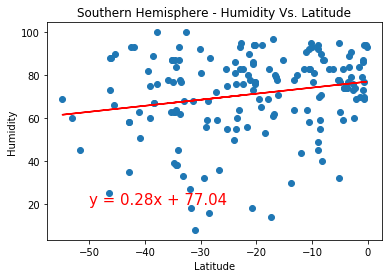

In [23]:
# Print out the r-squared value along with the plot.
x_values = SH_df['Lat']
y_values = SH_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity Vs. Latitude")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1537711916321354


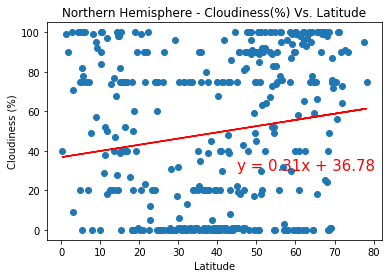

In [24]:
# Print out the r-squared value along with the plot.
x_values = NH_df['Lat']
y_values = NH_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(45,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness(%) Vs. Latitude")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.13619397664200877


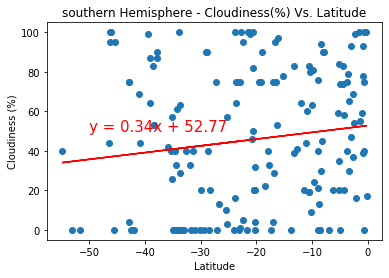

In [25]:
# Print out the r-squared value along with the plot.
x_values = SH_df['Lat']
y_values = SH_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(-50,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("southern Hemisphere - Cloudiness(%) Vs. Latitude")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1647896228739802


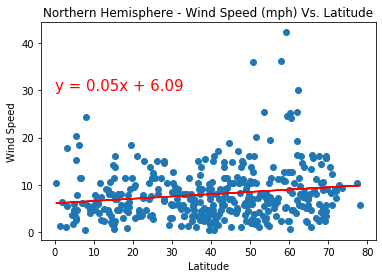

In [26]:
# Print out the r-squared value along with the plot.
x_values = NH_df['Lat']
y_values = NH_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(0,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed (mph) Vs. Latitude")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.19644392075673964


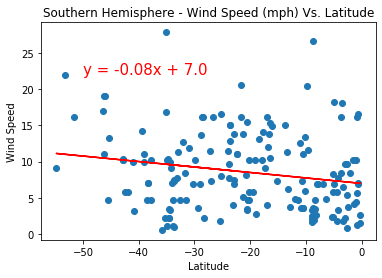

In [27]:
# Print out the r-squared value along with the plot.
x_values = SH_df['Lat']
y_values = SH_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(-50,22),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed (mph) Vs. Latitude")
print(f"The r-squared is: {rvalue}")
plt.show()